In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/sub_data/ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
df.shape

(17965, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [6]:
df.isnull().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [7]:
df.year.unique()

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 1998, 2007, 2005, 2006, 2002, 2003, 1996, 2004, 2000,
       2060], dtype=int64)

In [8]:
df.mileage.unique()

array([15944,  9083, 12456, ..., 31348,  7010,  5007], dtype=int64)

In [9]:
df.model.value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64

In [10]:
df.transmission.value_counts()

Manual       15517
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [11]:
df.fuelType.value_counts()

Petrol      12178
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

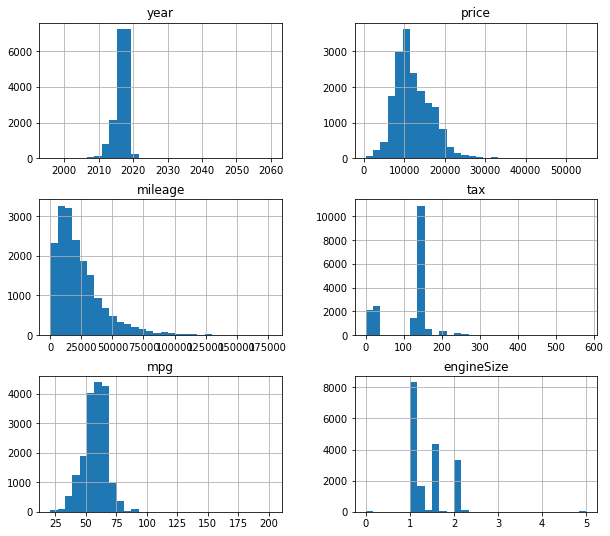

In [12]:
df.hist(bins = 30,figsize = (10,9))
plt.show()

<AxesSubplot:xlabel='transmission', ylabel='price'>

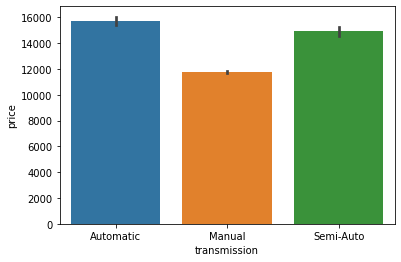

In [13]:
sns.barplot(x = 'transmission',y= 'price',data = df)

<AxesSubplot:xlabel='price', ylabel='model'>

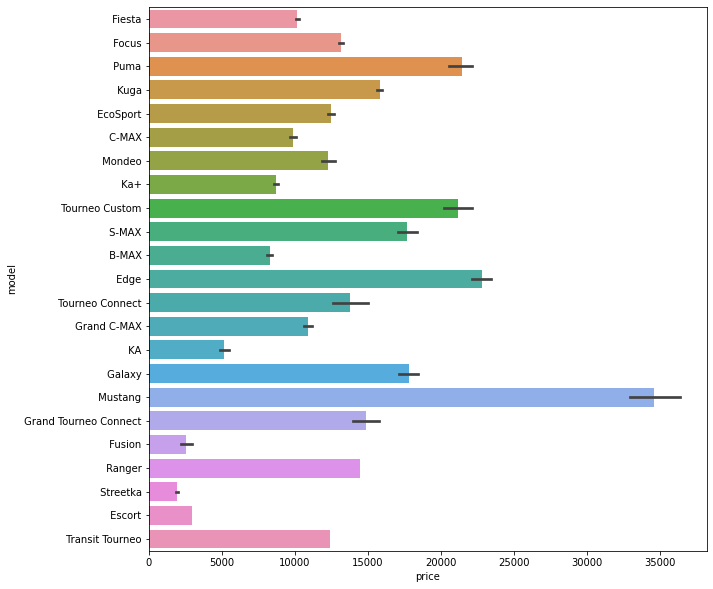

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'price',y= 'model',data = df)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

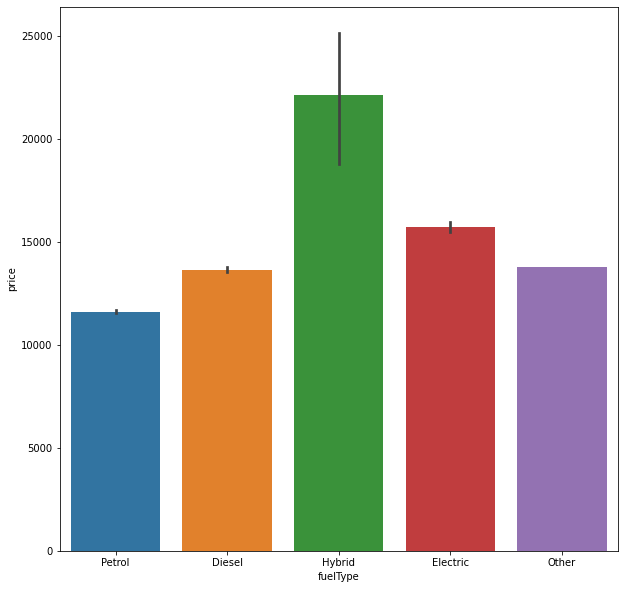

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(y = 'price',x= 'fuelType',data = df)

<AxesSubplot:xlabel='mpg', ylabel='price'>

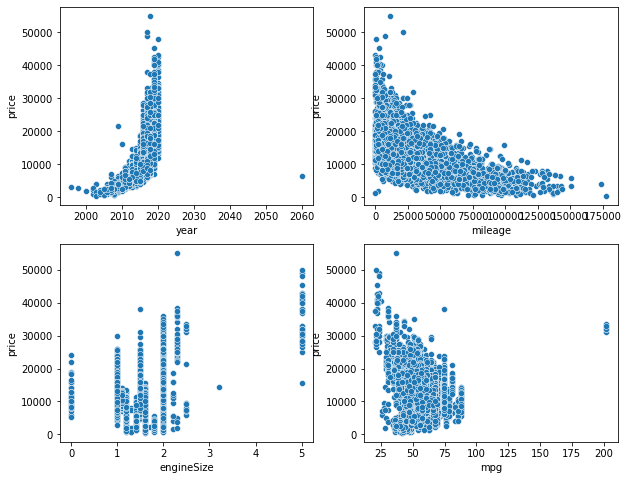

In [16]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221)
sns.scatterplot(x = 'year',y = 'price',data = df)

ax = fig.add_subplot(222)
sns.scatterplot(x = 'mileage',y = 'price',data = df)

ax = fig.add_subplot(223)
sns.scatterplot(x = 'engineSize',y = 'price',data = df)

ax = fig.add_subplot(224)
sns.scatterplot(x = 'mpg',y = 'price',data = df)

In [17]:
tmp = df.corr()
tmp.style.background_gradient()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.635994,-0.707899,0.298457,-0.022969,-0.137358
price,0.635994,1.000000,-0.530727,0.406821,-0.346427,0.411156
mileage,-0.707899,-0.530727,1.000000,-0.260550,0.120077,0.215001
tax,0.298457,0.406821,-0.260550,1.000000,-0.503013,0.184311
mpg,-0.022969,-0.346427,0.120077,-0.503013,1.000000,-0.260527
engineSize,-0.137358,0.411156,0.215001,0.184311,-0.260527,1.000000


In [18]:
df.isnull().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [19]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [20]:
variable_categorical = [i for i in df.columns if df[i].dtype == 'object']
variable_numberic = [i for i in df.columns if df[i].dtype == 'int64' or df[i].dtype == 'float64']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('price',axis = 1),df['price'],test_size = 0.2,random_state=0)

In [22]:
X_train.shape,X_test.shape

((14372, 8), (3593, 8))

In [23]:
## Kieerm tra nhan hiem
[i for i in X_train['model'].unique() if i not in X_test['model'].unique()]

[' Streetka', ' Ranger', ' Escort', ' Transit Tourneo']

In [24]:
[i for i in X_test['model'].unique() if i not in X_train['model'].unique()]

[]

In [25]:
tmp = X_train['model'].value_counts().sort_values(ascending=False) / len(X_train)
tmp

 Fiesta                   0.364528
 Focus                    0.256540
 Kuga                     0.121417
 EcoSport                 0.062691
 C-MAX                    0.030546
 Ka+                      0.030267
 Mondeo                   0.029850
 B-MAX                    0.020109
 S-MAX                    0.016630
 Grand C-MAX              0.014125
 Galaxy                   0.012316
 Edge                     0.011481
 KA                       0.011272
 Puma                     0.004105
 Tourneo Custom           0.004036
 Mustang                  0.003618
 Grand Tourneo Connect    0.003549
 Tourneo Connect          0.001809
 Fusion                   0.000765
 Streetka                 0.000139
 Ranger                   0.000070
 Escort                   0.000070
 Transit Tourneo          0.000070
Name: model, dtype: float64

In [26]:
dic = {k :('rare' if k not in tmp[tmp >= 0.0008].index else k.strip())for k in X_train['model'].unique() }
dic

{' Fiesta': 'Fiesta',
 ' EcoSport': 'EcoSport',
 ' Focus': 'Focus',
 ' Tourneo Connect': 'Tourneo Connect',
 ' Kuga': 'Kuga',
 ' Ka+': 'Ka+',
 ' Edge': 'Edge',
 ' B-MAX': 'B-MAX',
 ' Grand C-MAX': 'Grand C-MAX',
 ' C-MAX': 'C-MAX',
 ' Tourneo Custom': 'Tourneo Custom',
 ' KA': 'KA',
 ' Grand Tourneo Connect': 'Grand Tourneo Connect',
 ' Mondeo': 'Mondeo',
 ' S-MAX': 'S-MAX',
 ' Galaxy': 'Galaxy',
 ' Mustang': 'Mustang',
 ' Puma': 'Puma',
 ' Streetka': 'rare',
 ' Fusion': 'rare',
 ' Ranger': 'rare',
 ' Escort': 'rare',
 ' Transit Tourneo': 'rare'}

In [27]:
df['model'] = df['model'].map(dic)

<AxesSubplot:>

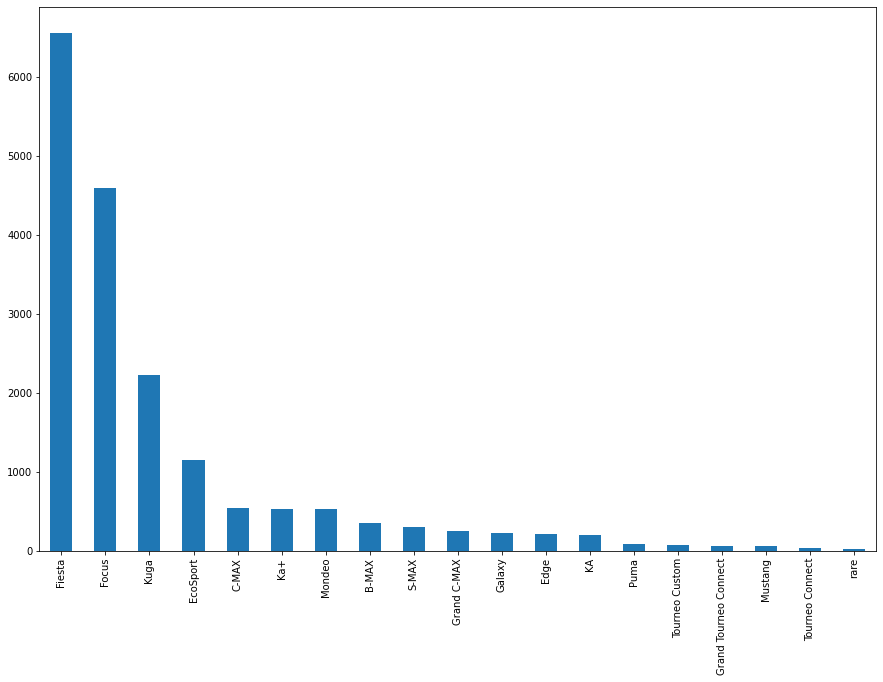

In [28]:
df.model.value_counts().sort_values(ascending=False).plot.bar(figsize = (15,10))

In [220]:
df_1 = df.copy()

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('price',axis = 1),df['price'],test_size = 0.2,random_state=0)

In [31]:
## Kieerm tra nhan hiem
[i for i in X_train['model'].unique() if i not in X_test['model'].unique()]

[]

In [32]:
## Kieerm tra nhan hiem
[i for i in X_test['model'].unique() if i not in X_train['model'].unique()]

[]

#### Mã hóa dữ liệu

In [33]:
variable_categorical = [i for i in variable_categorical if i != 'model']

In [34]:
variable_categorical

['transmission', 'fuelType']

In [35]:
from feature_engine.encoding import OneHotEncoder,OrdinalEncoder

In [36]:
encoder = OneHotEncoder(drop_last=True,variables=variable_categorical).fit(X_train,y_train)

In [37]:
encoder.encoder_dict_

{'transmission': ['Manual', 'Semi-Auto'],
 'fuelType': ['Petrol', 'Diesel', 'Hybrid', 'Other']}

In [38]:
encoder.variables_

['transmission', 'fuelType']

In [39]:
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [40]:
X_train

,model,year,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Other
7219,Fiesta,2014,26611,0,65.7,1.0,1,0,1,0,0,0
3257,EcoSport,2018,8169,145,53.3,1.0,1,0,1,0,0,0
14535,Focus,2019,3914,145,60.1,1.0,1,0,1,0,0,0
4436,EcoSport,2017,20962,125,53.3,1.0,1,0,1,0,0,0
14091,Fiesta,2016,32000,0,65.7,1.0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9225,Focus,2016,53530,0,74.3,1.5,1,0,0,1,0,0
13123,B-MAX,2017,26806,160,44.1,1.6,0,1,1,0,0,0
9845,Fiesta,2015,18136,0,88.3,1.5,1,0,0,1,0,0
10799,Kuga,2018,10435,145,54.3,1.5,1,0,0,1,0,0


In [41]:
encoder = OrdinalEncoder(encoding_method='arbitrary',variables=['model']).fit(X_train,y_train)

In [42]:
encoder.encoder_dict_

{'model': {'Fiesta': 0,
  'EcoSport': 1,
  'Focus': 2,
  'Tourneo Connect': 3,
  'Kuga': 4,
  'Ka+': 5,
  'Edge': 6,
  'B-MAX': 7,
  'Grand C-MAX': 8,
  'C-MAX': 9,
  'Tourneo Custom': 10,
  'KA': 11,
  'Grand Tourneo Connect': 12,
  'Mondeo': 13,
  'S-MAX': 14,
  'Galaxy': 15,
  'Mustang': 16,
  'Puma': 17,
  'rare': 18}}

In [43]:
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [44]:
X_test.head()

,model,year,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Other
12173,2,2017,26754,145,74.3,1.5,1,0,0,1,0,0
2734,0,2018,32709,145,65.7,1.0,1,0,1,0,0,0
7031,2,2017,40820,150,50.4,1.5,1,0,1,0,0,0
3750,2,2017,28786,20,67.3,2.0,1,0,0,1,0,0
651,4,2017,23270,145,54.3,2.0,0,1,0,1,0,0


In [45]:
X_train.shape

(14372, 12)

#### Co dãn đặc trưng

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
variable_numberic = [i for i in variable_numberic if i != 'price']

In [48]:
scale = StandardScaler().fit(X_train[variable_numberic])

In [49]:
X_train[variable_numberic] = scale.transform(X_train[variable_numberic])
X_test[variable_numberic] = scale.transform(X_test[variable_numberic])

In [50]:
round(X_train.describe(),1)

,model,year,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Other
count,14372.0,14372.0,14372.0,14372.0,14372.0,14372.0,14372.0,14372.0,14372.0,14372.0,14372.0,14372.0
mean,3.0,-0.0,0.0,-0.0,-0.0,0.0,0.9,0.1,0.7,0.3,0.0,0.0
std,3.9,1.0,1.0,1.0,1.0,1.0,0.3,0.2,0.5,0.5,0.0,0.0
min,0.0,-10.1,-1.2,-1.8,-3.7,-3.1,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,-0.4,-0.7,-1.3,-0.6,-0.8,1.0,0.0,0.0,0.0,0.0,0.0
50%,2.0,0.1,-0.3,0.5,0.1,-0.3,1.0,0.0,1.0,0.0,0.0,0.0
75%,4.0,0.6,0.4,0.5,0.8,0.3,1.0,0.0,1.0,1.0,0.0,0.0
max,18.0,20.9,7.9,7.5,14.2,8.3,1.0,1.0,1.0,1.0,1.0,1.0


### Lựa chọn đặc trưng

In [51]:
from feature_engine.selection import DropDuplicateFeatures,DropConstantFeatures

In [52]:
drop = DropConstantFeatures(tol = 0.998).fit(X_train,y_train)

In [53]:
drop.features_to_drop_

['fuelType_Hybrid', 'fuelType_Other']

In [54]:
drop.n_features_in_

12

In [55]:
X_train = drop.transform(X_train)
X_test = drop.transform(X_test)

In [56]:
drop = DropDuplicateFeatures().fit(X_train,y_train)

In [57]:
drop.features_to_drop_

set()

In [58]:
X_train = drop.transform(X_train)
X_test = drop.transform(X_test)

In [59]:
X_train.head()

,model,year,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol,fuelType_Diesel
7219,0,-1.387392,0.165620,-1.805835,0.760060,-0.802488,1,0,1,0
3257,1,0.554052,-0.781885,0.513309,-0.460273,-0.802488,1,0,1,0
14535,2,1.039412,-1.000497,0.513309,0.208942,-0.802488,1,0,1,0
4436,1,0.068691,-0.124612,0.193427,-0.460273,-0.802488,1,0,1,0
14091,0,-0.416670,0.442493,-1.805835,0.760060,-0.802488,1,0,1,0


In [60]:
X_train.shape

(14372, 10)

###### Lựa chọn đặc trưng theo lai hóa

In [61]:
from feature_engine.selection import RecursiveFeatureAddition,RecursiveFeatureElimination
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
model = GradientBoostingRegressor()
clf = RecursiveFeatureAddition(model,scoring='neg_mean_squared_error',cv = 5).fit(X_train,y_train)

<AxesSubplot:>

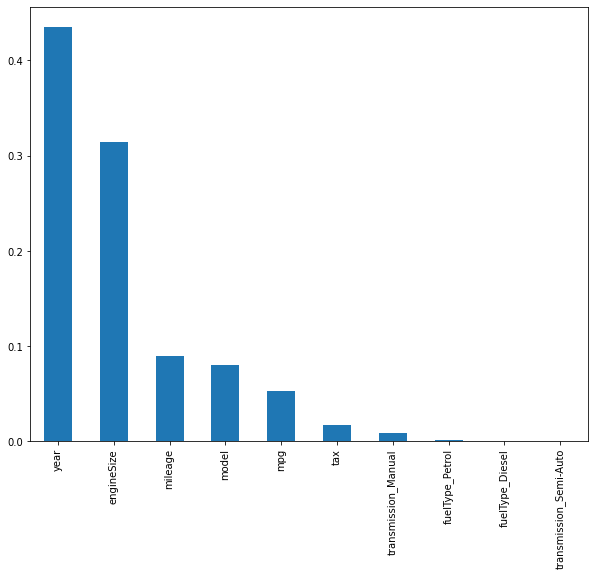

In [63]:
clf.feature_importances_.plot.bar(figsize = (10,8))

In [64]:
clf.features_to_drop_

['tax', 'fuelType_Diesel']

In [65]:
X_train_add = clf.transform(X_train)
X_test_add = clf.transform(X_test)

In [66]:
X_train_add.shape,X_test_add.shape

((14372, 8), (3593, 8))

In [67]:
model = GradientBoostingRegressor()
clf = RecursiveFeatureElimination(model,scoring='neg_mean_squared_error',cv = 5).fit(X_train,y_train)

<AxesSubplot:>

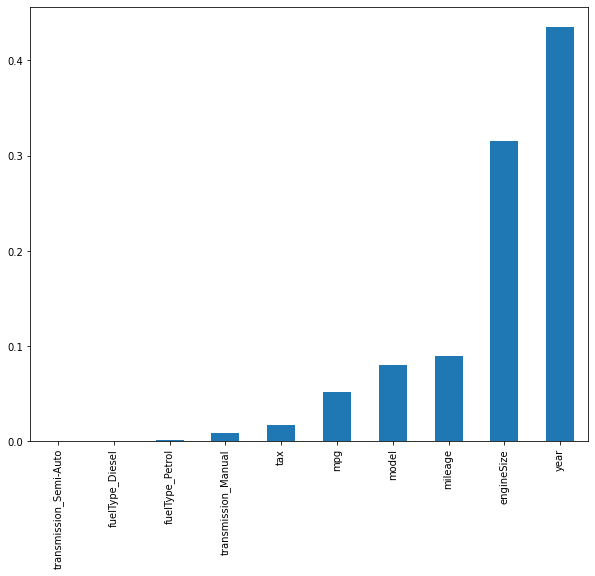

In [68]:
clf.feature_importances_.plot.bar(figsize = (10,8))

In [69]:
clf.features_to_drop_

['fuelType_Diesel']

In [70]:
X_train_eli = clf.transform(X_train)
X_test_eli = clf.transform(X_test)

In [71]:
X_train_eli.shape,X_test_eli.shape

((14372, 9), (3593, 9))

##### Lựa chọn đặc trưng theo pp nhúng

In [72]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [73]:
paramter = {'alpha': [0.01,0.05,0.5,1,5,10,50,100,200]}
clf = GridSearchCV(Lasso(),paramter,cv=5,scoring='neg_mean_squared_error').fit(X_train,y_train)

C:\Users\nguye\.conda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.710e+10, tolerance: 2.591e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\nguye\.conda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.866e+10, tolerance: 2.571e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\nguye\.conda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

In [74]:
clf.best_params_

{'alpha': 0.05}

In [75]:
model = SelectFromModel(Lasso(clf.best_params_['alpha'])).fit(X_train,y_train)

C:\Users\nguye\.conda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.026e+10, tolerance: 3.228e+07
  model = cd_fast.enet_coordinate_descent(


In [76]:
select = X_train.columns[model.get_support()]

In [77]:
X_train_lasso = X_train[select]
X_test_lasso = X_test[select]

### Triển khai mô hình

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
model = LinearRegression().fit(X_train_lasso,y_train)

In [80]:
model.coef_

array([   56.33973445,  2348.29381777, -1243.32654163,    83.42974583,
       -1067.98154351,  1670.99897684,  -787.32205301,  -380.35590617,
       -8245.9801658 , -6892.36436009])

In [81]:
model.predict(X_test[:5])

array([11868.25160383, 10156.02268464, 12134.77552178, 14216.58088176,
       16621.73650012])

In [82]:
list(y_test[:5])

[11670, 10000, 11599, 14899, 19498]

In [83]:
from sklearn.model_selection import cross_val_score,KFold
def rmse(model,X,y):
    cv = KFold(n_splits=10,shuffle=True).get_n_splits(X.values)
    score = cross_val_score(model,X,y,cv = cv,scoring='neg_mean_squared_error')
    score = np.sqrt(-score)
    print(f"Gía trị rmse của 10 fold: \n {score}")
    print(f'Giá trị trung bình: {score.mean()} và Độ lệch chuẩn: {score.std()}')

In [84]:
model = LinearRegression()
rmse(model,X_train_add,y_train)
print("--------------------------------------------------")
rmse(model,X_train_add,y_train)
print('--------------------------------------------------')
rmse(model,X_train_eli,y_train)

Gía trị rmse của 10 fold: 
 [2232.24571851 2292.96953774 2570.78320596 2408.49899813 2465.5657062
 2489.09742582 2808.18982245 2382.85162565 2305.44173987 2456.08053691]
Giá trị trung bình: 2441.1724317238118 và Độ lệch chuẩn: 155.92336773817442
--------------------------------------------------
Gía trị rmse của 10 fold: 
 [2232.24571851 2292.96953774 2570.78320596 2408.49899813 2465.5657062
 2489.09742582 2808.18982245 2382.85162565 2305.44173987 2456.08053691]
Giá trị trung bình: 2441.1724317238118 và Độ lệch chuẩn: 155.92336773817442
--------------------------------------------------
Gía trị rmse của 10 fold: 
 [2236.13847441 2294.39372731 2573.04303896 2406.37895202 2465.06309615
 2485.89494985 2803.47564814 2385.54793252 2302.57069619 2452.04512972]
Giá trị trung bình: 2440.4551645278543 và Độ lệch chuẩn: 154.41354861041432


In [85]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
rmse(model,X_train_add,y_train)
print("--------------------------------------------------")
rmse(model,X_train_add,y_train)
print('--------------------------------------------------')
rmse(model,X_train_eli,y_train)

Gía trị rmse của 10 fold: 
 [1587.51251243 1510.32942451 1743.90259209 1486.4452783  1577.98345991
 1498.01245505 1786.29021927 1563.87672497 1755.84235642 1531.38522637]
Giá trị trung bình: 1604.158024933396 và Độ lệch chuẩn: 108.40499985911148
--------------------------------------------------
Gía trị rmse của 10 fold: 
 [1572.0897452  1504.03815082 1733.57764858 1500.90880599 1595.97262014
 1499.38156176 1800.73445333 1577.47933836 1778.3554077  1538.74650213]
Giá trị trung bình: 1610.1284234020757 và Độ lệch chuẩn: 110.96319004908668
--------------------------------------------------
Gía trị rmse của 10 fold: 
 [1683.43493327 1540.07525172 1741.06536632 1480.07180877 1577.19401944
 1464.32950698 1722.71258113 1420.63074256 1812.68817349 1661.4518533 ]
Giá trị trung bình: 1610.365423698201 và Độ lệch chuẩn: 126.06785673326489


In [86]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
rmse(model,X_train_add,y_train)
print("--------------------------------------------------")
rmse(model,X_train_add,y_train)
print('--------------------------------------------------')
rmse(model,X_train_eli,y_train)

Gía trị rmse của 10 fold: 
 [1203.05893547 1259.30620931 1451.49943321 1205.43221681 1362.43147338
 1220.39559268 1501.45806522 1282.79768319 1343.87863388 1243.99419489]
Giá trị trung bình: 1307.4252438048586 và Độ lệch chuẩn: 99.2850255638918
--------------------------------------------------
Gía trị rmse của 10 fold: 
 [1198.69602684 1266.91049279 1470.69247634 1210.06132624 1361.06270147
 1229.7029829  1491.53913454 1252.14204909 1366.74970607 1240.67345923]
Giá trị trung bình: 1308.8230355504456 và Độ lệch chuẩn: 101.69903970525412
--------------------------------------------------
Gía trị rmse của 10 fold: 
 [1202.07966097 1254.07159411 1423.77351549 1202.65713211 1337.51326469
 1234.17927263 1464.26644498 1171.59899399 1357.36462083 1232.58562711]
Giá trị trung bình: 1288.0090126920427 và Độ lệch chuẩn: 95.9691535999135


In [87]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
rmse(model,X_train_add,y_train)
print("--------------------------------------------------")
rmse(model,X_train_add,y_train)
print('--------------------------------------------------')
rmse(model,X_train_eli,y_train)

Gía trị rmse của 10 fold: 
 [1308.39131409 1355.79490666 1558.15178633 1297.73630392 1472.97077874
 1349.88285927 1573.20870979 1340.73172731 1401.35357481 1366.35241887]
Giá trị trung bình: 1402.4574379796948 và Độ lệch chuẩn: 93.93622420238238
--------------------------------------------------
Gía trị rmse của 10 fold: 
 [1308.17551407 1355.79490666 1558.15178633 1297.66935636 1472.97077874
 1350.01119374 1574.36806494 1340.73172731 1401.35357481 1366.35241887]
Giá trị trung bình: 1402.5579321834787 và Độ lệch chuẩn: 94.16926349525019
--------------------------------------------------
Gía trị rmse của 10 fold: 
 [1323.7179971  1363.24123988 1571.01676693 1278.81592408 1476.00756555
 1388.03372356 1576.46985356 1332.16586438 1396.47362891 1369.85822664]
Giá trị trung bình: 1407.5800790595997 và Độ lệch chuẩn: 96.49470037858343


In [88]:
paramter = {'learning_rate':[0.001,0.005,0.1,0.5],'n_estimators':[50,100,150,200],'max_depth':[3,5,10,15,20]}
clf = GridSearchCV(GradientBoostingRegressor(),paramter,cv = 5, scoring='neg_mean_squared_error').fit(X_train_lasso,y_train)

In [89]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [90]:
model = GradientBoostingRegressor(learning_rate=clf.best_params_['learning_rate']
                                  ,max_depth=clf.best_params_['max_depth']
                                  ,n_estimators=clf.best_params_['n_estimators']).fit(X_train_lasso,y_train)

In [91]:
model.predict(X_test_lasso[:5])

array([11206.65945972, 10375.35232199, 11081.37765114, 15605.4393776 ,
       17336.88236102])

In [92]:
list(y_test[:5])

[11670, 10000, 11599, 14899, 19498]

In [93]:
from sklearn.metrics import mean_squared_error

In [94]:
mean_squared_error(y_test,model.predict(X_test_lasso))

1355108.1581194515

In [95]:
from sklearn.metrics import r2_score

In [96]:
r2_score(y_test,model.predict(X_test_lasso))

0.9398845842558933

#### scaling output test

In [221]:
df_1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [222]:
from feature_engine.encoding import OneHotEncoder,OrdinalEncoder

In [223]:
encoder = OneHotEncoder(drop_last=True,variables=['transmission','fuelType']).fit(df_1)

In [224]:
df_1 = encoder.transform(df_1)

In [225]:
df_1.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Electric
0,Fiesta,2017,12000,15944,150,57.7,1.0,1,0,1,0,0,0
1,Focus,2018,14000,9083,150,57.7,1.0,0,1,1,0,0,0
2,Focus,2017,13000,12456,150,57.7,1.0,0,1,1,0,0,0
3,Fiesta,2019,17500,10460,145,40.3,1.5,0,1,1,0,0,0
4,Fiesta,2019,16500,1482,145,48.7,1.0,1,0,1,0,0,0


In [226]:
encoder = OrdinalEncoder(encoding_method='arbitrary',variables=['model'])

In [227]:
df_1 = encoder.fit_transform(df_1)

In [228]:
df_1

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Electric
0,0,2017,12000,15944,150,57.7,1.0,1,0,1,0,0,0
1,1,2018,14000,9083,150,57.7,1.0,0,1,1,0,0,0
2,1,2017,13000,12456,150,57.7,1.0,0,1,1,0,0,0
3,0,2019,17500,10460,145,40.3,1.5,0,1,1,0,0,0
4,0,2019,16500,1482,145,48.7,1.0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17960,0,2016,7999,31348,125,54.3,1.2,0,1,1,0,0,0
17961,10,2017,8999,16700,150,47.1,1.4,0,1,1,0,0,0
17962,10,2014,7499,40700,30,57.7,1.0,0,1,1,0,0,0
17963,1,2015,9999,7010,20,67.3,1.6,0,1,0,1,0,0


In [229]:
X_train,X_test,y_train,y_test = train_test_split(df_1.drop('price',axis = 1),df_1['price'],test_size=0.2,random_state=1)

In [230]:
X_train.head()

,model,year,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Electric
8024,0,2018,20055,150,88.3,1.5,0,1,0,1,0,0
6519,6,2015,30100,145,48.7,1.5,0,1,1,0,0,0
14410,1,2019,1821,145,74.3,1.5,1,0,0,1,0,0
12290,1,2017,38729,125,51.4,1.0,0,0,1,0,0,0
2618,0,2013,15974,0,65.7,1.0,0,1,1,0,0,0


In [231]:
X_test.head()

,model,year,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Electric
3315,6,2017,58827,145,48.7,1.5,0,1,1,0,0,0
16429,6,2014,71869,30,61.4,2.0,0,1,0,1,0,0
13981,0,2010,91000,20,68.9,1.6,0,1,0,1,0,0
6059,0,2019,1307,145,48.7,1.0,0,0,1,0,0,0
12523,1,2019,2972,145,58.9,1.0,0,1,1,0,0,0


In [232]:
X_train.shape,X_test.shape

((14372, 12), (3593, 12))

In [233]:
[i for i in X_train['model'].unique() if i not in X_test['model'].unique()]

[]

In [234]:
[i for i in X_test['model'].unique() if i not in X_train['model'].unique()]

[]

In [235]:
from sklearn.preprocessing import StandardScaler

In [236]:
scale1 = StandardScaler().fit(X_train)

In [237]:
X_train = scale1.transform(X_train)
X_test = scale1.transform(X_test)

In [238]:
scale = StandardScaler().fit(np.array(y_train).reshape(-1,1))

In [239]:
ytrain = scale.transform(np.array(y_train).reshape(-1,1))

In [240]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(X_train,ytrain.reshape(-1,))

In [257]:
y = model.predict((X_train))

In [255]:
list(scale.inverse_transform(ytrain))

[array([10995.]),
 array([12950.]),
 array([17699.]),
 array([10000.]),
 array([6800.]),
 array([12000.]),
 array([21200.]),
 array([8498.]),
 array([9760.]),
 array([16000.]),
 array([20499.]),
 array([17000.]),
 array([10600.]),
 array([9600.]),
 array([8250.]),
 array([8750.]),
 array([9814.]),
 array([10800.]),
 array([14698.]),
 array([8999.]),
 array([14499.]),
 array([10800.]),
 array([22000.]),
 array([10468.]),
 array([11290.]),
 array([9490.]),
 array([12995.]),
 array([9950.]),
 array([10500.]),
 array([8498.]),
 array([15000.]),
 array([13140.]),
 array([16995.]),
 array([19000.]),
 array([12271.]),
 array([10095.]),
 array([13000.]),
 array([13195.]),
 array([17000.]),
 array([8700.]),
 array([19500.]),
 array([7295.]),
 array([13489.]),
 array([7695.]),
 array([14698.]),
 array([2699.]),
 array([15498.]),
 array([16300.]),
 array([8990.]),
 array([14500.]),
 array([15999.]),
 array([9200.]),
 array([16407.]),
 array([12000.]),
 array([9980.]),
 array([12980.]),
 array([20

In [258]:
scale.inverse_transform(y.reshape(-1,1))

array([[11938.63809598],
       [ 9194.85851672],
       [18528.20457439],
       ...,
       [13662.46838345],
       [15809.06370238],
       [10720.17579697]])

In [259]:
mean_squared_error(scale.inverse_transform(ytrain),scale.inverse_transform(y.reshape(-1,1)))

1767523.71747618

In [260]:
r2_score(scale.inverse_transform(ytrain),scale.inverse_transform(y.reshape(-1,1)))

0.9218061300198859